# Кредитный скоринг

## 1 EDA

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss

In [ ]:
raw_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI_my_project/credit_scoring/german_credit.csv')
raw_data.head()

,checking_acc_status,duration,cred_hist,purpose,loan_amt,saving_acc_bonds,present_employment_since,installment_rate,personal_stat_gender,other_debtors_guarantors,present_residence_since,property,age,other_installment_plans,housing,num_curr_loans,job,num_people_provide_maint,telephone,is_foreign_worker,target
0,below_0,6,risky_acc_or_curr_loan_other,radio_tv,1169,unknown_no_saving_acc,above_7y,4,male:single,none,4,real_estate,67,none,own,2,skilled_official,1,yes,yes,good
1,below_200,48,curr_loans_paid_duly,radio_tv,5951,below_100,below_4y,2,female:divorced_or_married,none,2,real_estate,22,none,own,1,skilled_official,1,no,yes,bad
2,no_cheking_acc,12,risky_acc_or_curr_loan_other,education,2096,below_100,below_7y,2,male:single,none,3,real_estate,49,none,own,1,unskilled_resident,2,no,yes,good
3,below_0,42,curr_loans_paid_duly,furniture_equipment,7882,below_100,below_7y,2,male:single,guarantor,4,life_insurance_or_aggreements,45,none,for_free,1,skilled_official,2,no,yes,good
4,below_0,24,delay_in_past,car_new,4870,below_100,below_4y,3,male:single,none,4,unknown_or_no_property,53,none,for_free,2,skilled_official,2,no,yes,bad


### Описание признаков для задачи кредитного скоринга

#### 1. **Статус расчетного счета заемщика (`checking_acc_status`)**
   - Описание: Текущее состояние расчетного счета заемщика.
   - Пример значений: "без счета", "ниже 0", "0-200", "выше 200".

#### 2. **Срок предоставления кредита (`duration`)**
   - Описание: Продолжительность кредита в месяцах.
   - Пример значений: 6, 12, 24, 48.

#### 3. **Статус кредитной истории (`cred_hist`)**
   - Описание: История погашения кредитов заемщиком.
   - Категории:
     - **no_loan_or_paid_duly_other**: Отсутствие кредитов или своевременное погашение всех кредитов в других банках.
     - **paid_duly_this_bank**: Своевременное погашение всех кредитов в данном банке.
     - **curr_loans_paid_duly**: Текущие кредиты погашаются своевременно.
     - **delay_in_past**: Наличие задержек по погашению в прошлом.
     - **risky_acc_or_curr_loan_other**: Наличие проблемных счетов или текущих кредитов в других банках.

#### 4. **Цель запроса кредита (`purpose`)**
   - Описание: Цель, для которой запрашивается кредит.
   - Категории:
     - **car_new**: Покупка нового автомобиля.
     - **car_used**: Покупка подержанного автомобиля.
     - **furniture_equipment**: Покупка мебели или оборудования.
     - **radio_tv**: Покупка радио- или телевизионной техники.
     - **domestic_appliance**: Покупка бытовой техники.
     - **repairs**: Проведение ремонтных работ.
     - **education**: Оплата образования.
     - **retraining**: Повышение квалификации.
     - **business**: Предпринимательская деятельность.
     - **other**: Прочие цели.

#### 5. **Сумма кредита (`loan_amt`)**
   - Описание: Общая сумма запрашиваемого кредита.
   - Пример значений: 1169, 5951, 2096, 7882.

#### 6. **Сберегательный счет или облигации (`saving_acc_bonds`)**
   - Описание: Наличие и объем сбережений или инвестиций заемщика.
   - Пример значений: "без сбережений", "ниже 100", "100-500", "500-1000", "выше 1000".

#### 7. **Рабочий стаж на текущем месте (`present_employment_since`)**
   - Описание: Продолжительность работы заемщика на текущем месте.
   - Пример значений: "менее 1 года", "1-4 года", "4-7 лет", "более 7 лет".

#### 8. **Ставка рассрочки (`installment_rate`)**
   - Описание: Процент дохода, который заемщик готов выделять на погашение кредита.
   - Пример значений: 1, 2, 3, 4.

#### 9. **Пол и семейное положение (`personal_stat_gender`)**
   - Описание: Пол заемщика и его семейный статус.
   - Пример значений: "мужчина: холост", "женщина: замужем/разведена".

#### 10. **Поручители или созаемщики (`other_debtors_guarantors`)**
   - Описание: Наличие третьих лиц, гарантирующих погашение кредита.
   - Пример значений: "нет", "поручитель", "созаемщик".

#### 11. **Продолжительность проживания по текущему адресу (`present_residence_since`)**
   - Описание: Время, в течение которого заемщик проживает по текущему адресу.
   - Пример значений: 1, 2, 3, 4.

#### 12. **Наличие имущества (`property`)**
   - Описание: Наличие имущества, которое может быть использовано для оценки финансовой устойчивости заемщика.
   - Пример значений: "недвижимость", "страховой полис", "автомобиль", "нет имущества".

#### 13. **Возраст заемщика (`age`)**
   - Описание: Возраст заемщика на момент подачи заявки на кредит.
   - Пример значений: 22, 45, 67.

#### 14. **Другие планы платежей (`other_installment_plans`)**
   - Описание: Наличие других кредитных обязательств или рассрочек.
   - Пример значений: "нет", "банк", "магазин".

#### 15. **Условия проживания (`housing`)**
   - Описание: Условия проживания заемщика.
   - Пример значений: "аренда", "собственное жилье", "бесплатное проживание".

#### 16. **Количество действующих кредитов (`num_curr_loans`)**
   - Описание: Общее количество текущих кредитов заемщика.
   - Пример значений: 1, 2, 3.

#### 17. **Род занятий (`job`)**
   - Описание: Текущая занятость заемщика.
   - Пример значений: "квалифицированный специалист", "неквалифицированный работник", "безработный".

#### 18. **Количество иждивенцев (`num_people_provide_maint`)**
   - Описание: Количество людей, финансово зависящих от заемщика (например, алименты).
   - Пример значений: 1, 2, 3.

#### 19. **Наличие телефона (`telephone`)**
   - Описание: Наличие телефона у заемщика.
   - Пример значений: "да", "нет".

#### 20. **Иностранный работник (`is_foreign_worker`)**
   - Описание: Указывает, является ли заемщик иностранным работником.
   - Пример значений: "да", "нет".

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   checking_acc_status       1000 non-null   object
 1   duration                  1000 non-null   int64 
 2   cred_hist                 1000 non-null   object
 3   purpose                   1000 non-null   object
 4   loan_amt                  1000 non-null   int64 
 5   saving_acc_bonds          1000 non-null   object
 6   present_employment_since  1000 non-null   object
 7   installment_rate          1000 non-null   int64 
 8   personal_stat_gender      1000 non-null   object
 9   other_debtors_guarantors  1000 non-null   object
 10  present_residence_since   1000 non-null   int64 
 11  property                  1000 non-null   object
 12  age                       1000 non-null   int64 
 13  other_installment_plans   1000 non-null   object
 14  housing                  

In [ ]:
raw_data.isnull().sum()

,0
checking_acc_status,0
duration,0
cred_hist,0
purpose,0
loan_amt,0
saving_acc_bonds,0
present_employment_since,0
installment_rate,0
personal_stat_gender,0
other_debtors_guarantors,0


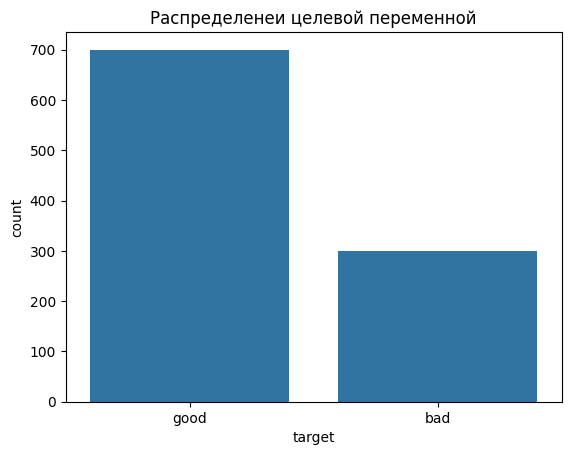

In [ ]:
sns.countplot(x='target', data=raw_data)
plt.title('Распределенеи целевой переменной')
plt.show()

### 1.2 Изучение категориальных признаков

In [ ]:
raw_data.describe(include=['O'])

,checking_acc_status,cred_hist,purpose,saving_acc_bonds,present_employment_since,personal_stat_gender,other_debtors_guarantors,property,other_installment_plans,housing,job,telephone,is_foreign_worker,target
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,5,10,5,5,4,3,4,3,3,4,2,2,2
top,no_cheking_acc,curr_loans_paid_duly,radio_tv,below_100,below_4y,male:single,none,car_or_other,none,own,skilled_official,no,yes,good
freq,394,530,280,603,339,548,907,332,814,713,630,596,963,700



Значения в checking_acc_status
no_cheking_acc    394
below_0           274
below_200         269
above:200          63
Name: count, dtype: int64
____________________________________________________________________________________________________



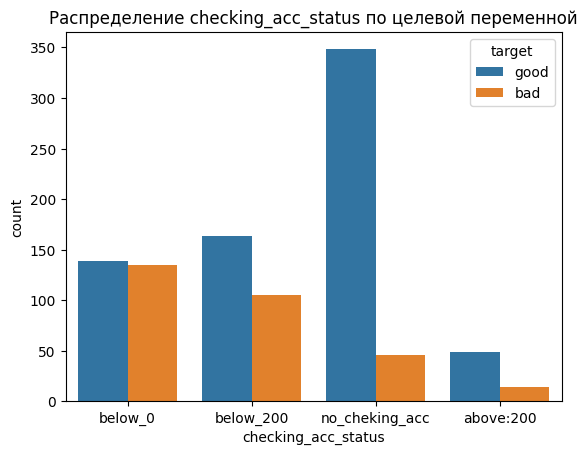

____________________________________________________________________________________________________

Значения в cred_hist
curr_loans_paid_duly            530
risky_acc_or_curr_loan_other    293
delay_in_past                    88
paid_duly_this_bank              49
no_loan_or_paid_duly_other       40
Name: count, dtype: int64
____________________________________________________________________________________________________



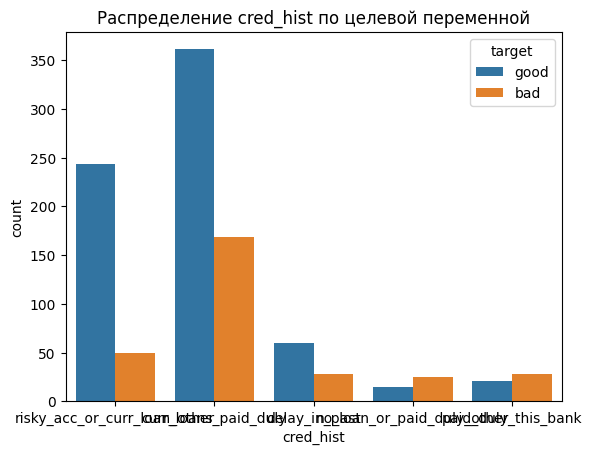

____________________________________________________________________________________________________

Значения в purpose
radio_tv               280
car_new                234
furniture_equipment    181
car_used               103
business                97
education               50
repairs                 22
domestic_applience      12
others                  12
retraining               9
Name: count, dtype: int64
____________________________________________________________________________________________________



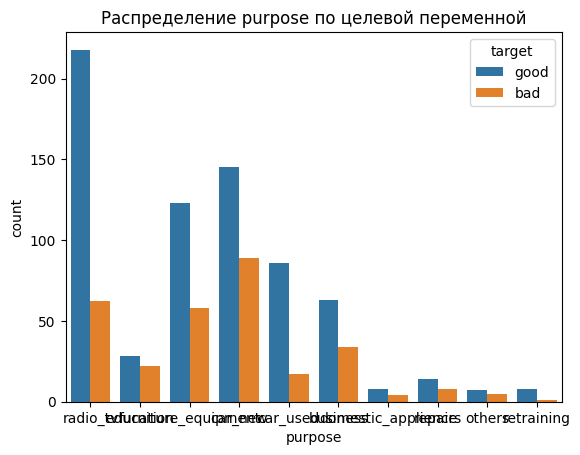

____________________________________________________________________________________________________

Значения в saving_acc_bonds
below_100                603
unknown_no_saving_acc    183
below_500                103
below_1000                63
above_1000                48
Name: count, dtype: int64
____________________________________________________________________________________________________



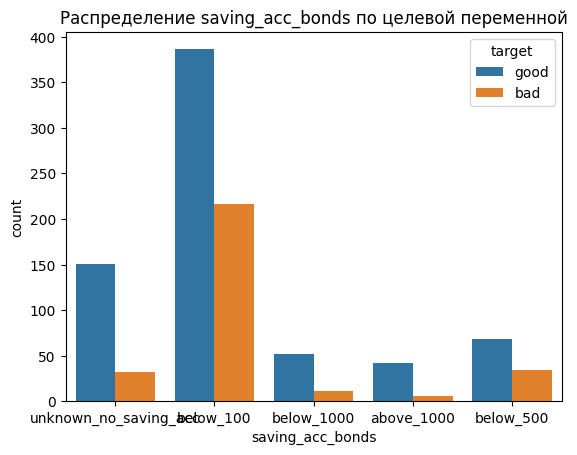

____________________________________________________________________________________________________

Значения в present_employment_since
below_4y      339
above_7y      253
below_7y      174
below_1y      172
unemployed     62
Name: count, dtype: int64
____________________________________________________________________________________________________



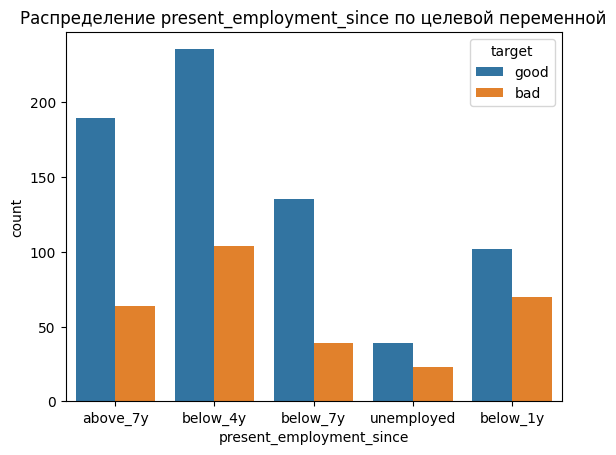

____________________________________________________________________________________________________

Значения в personal_stat_gender
male:single                   548
female:divorced_or_married    310
male:married_or_widowed        92
male:divorced                  50
Name: count, dtype: int64
____________________________________________________________________________________________________



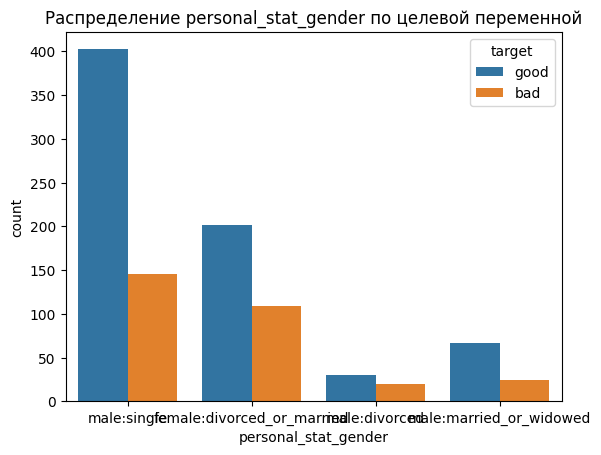

____________________________________________________________________________________________________

Значения в other_debtors_guarantors
none            907
guarantor        52
co_applicant     41
Name: count, dtype: int64
____________________________________________________________________________________________________



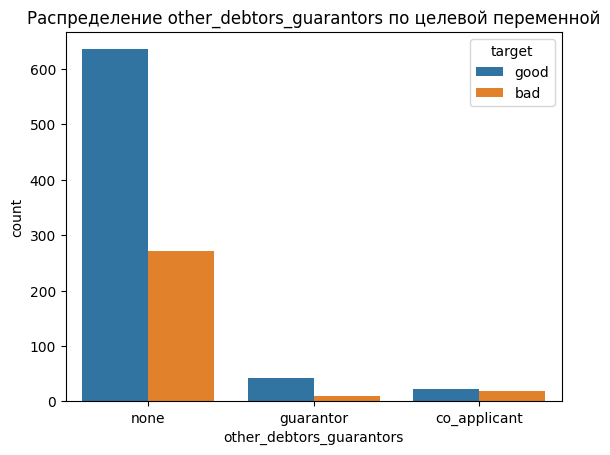

____________________________________________________________________________________________________

Значения в property
car_or_other                     332
real_estate                      282
life_insurance_or_aggreements    232
unknown_or_no_property           154
Name: count, dtype: int64
____________________________________________________________________________________________________



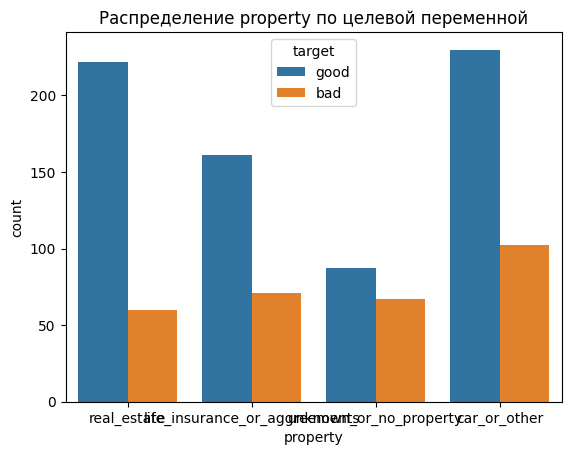

____________________________________________________________________________________________________

Значения в other_installment_plans
none     814
bank     139
store     47
Name: count, dtype: int64
____________________________________________________________________________________________________



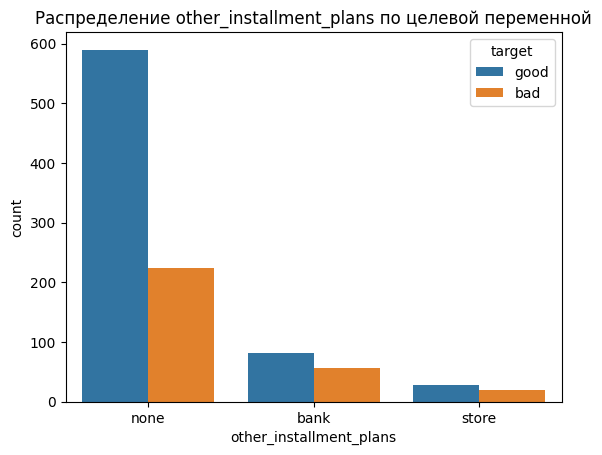

____________________________________________________________________________________________________

Значения в housing
own         713
rent        179
for_free    108
Name: count, dtype: int64
____________________________________________________________________________________________________



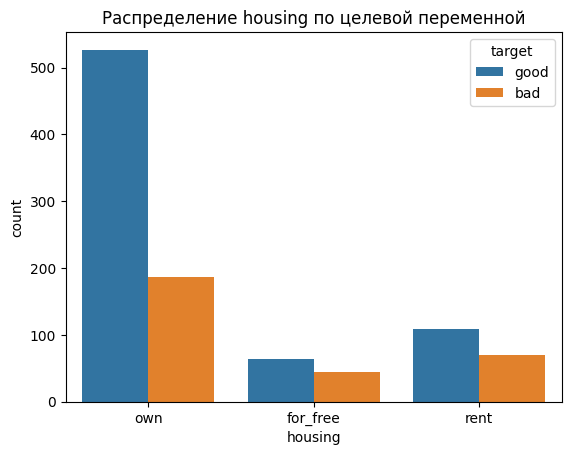

____________________________________________________________________________________________________

Значения в job
skilled_official           630
unskilled_resident         200
management_or_self_emp     148
unemployed_non_resident     22
Name: count, dtype: int64
____________________________________________________________________________________________________



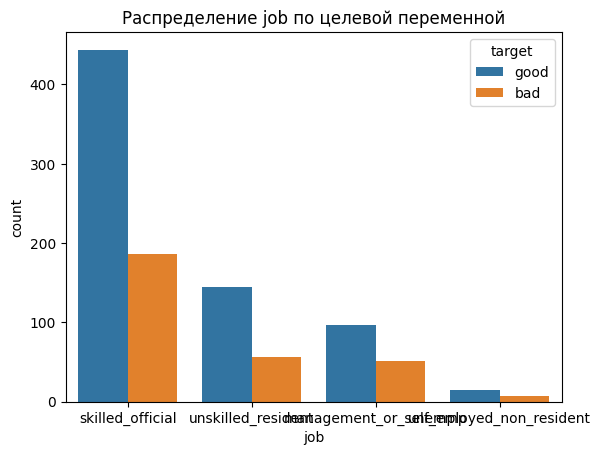

____________________________________________________________________________________________________

Значения в telephone
no     596
yes    404
Name: count, dtype: int64
____________________________________________________________________________________________________



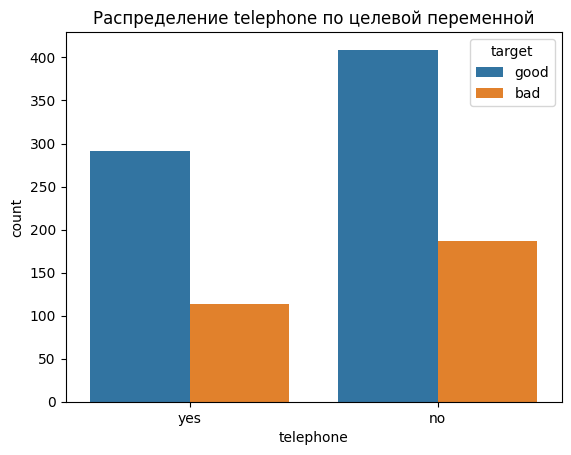

____________________________________________________________________________________________________

Значения в is_foreign_worker
yes    963
no      37
Name: count, dtype: int64
____________________________________________________________________________________________________



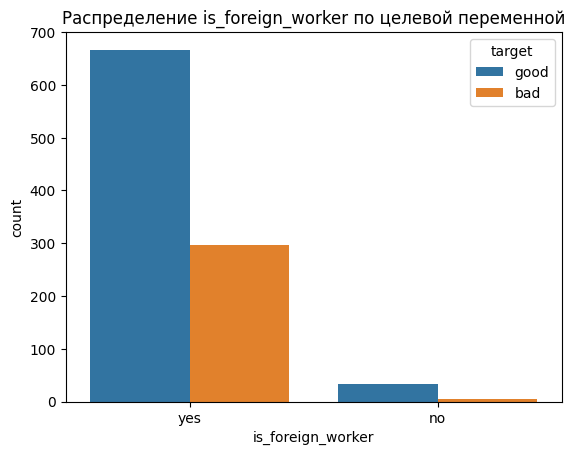

____________________________________________________________________________________________________

Значения в target
good    700
bad     300
Name: count, dtype: int64
____________________________________________________________________________________________________



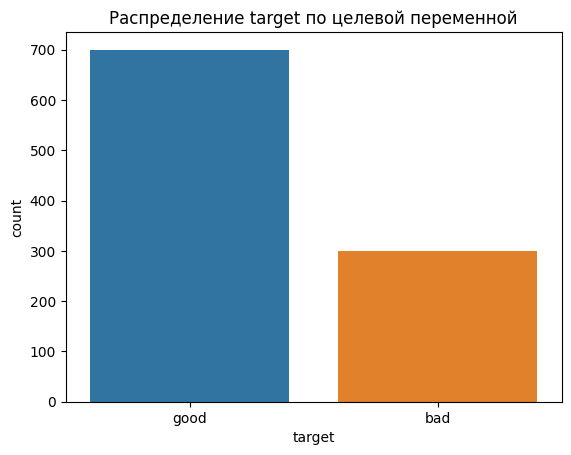

____________________________________________________________________________________________________


In [ ]:
cat_cols = raw_data.select_dtypes(include=['object']).columns

for col in cat_cols:
    print()
    print(f'Значения в {raw_data[col].value_counts()}')
    print('_' * 100)
    print()
    sns.countplot(x=col, hue='target',  data=raw_data)
    plt.title(f'Распределение {col} по целевой переменной')
    plt.show()
    print('_' * 100)

### 1.3 Изучение числовых признаков

In [ ]:
raw_data.describe()

,duration,loan_amt,installment_rate,present_residence_since,age,num_curr_loans,num_people_provide_maint
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


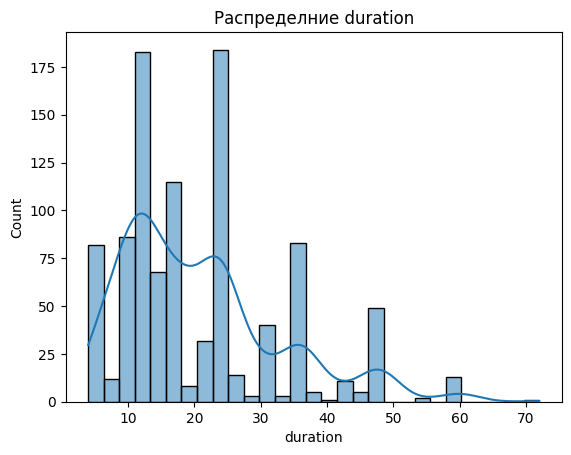

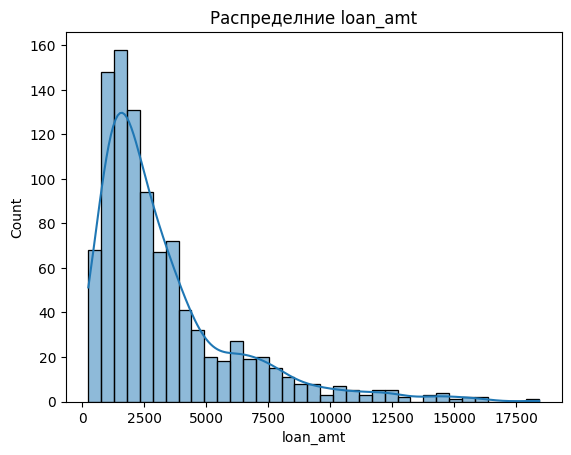

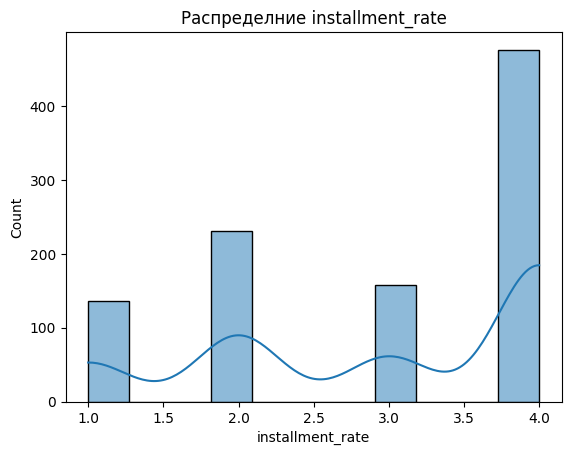

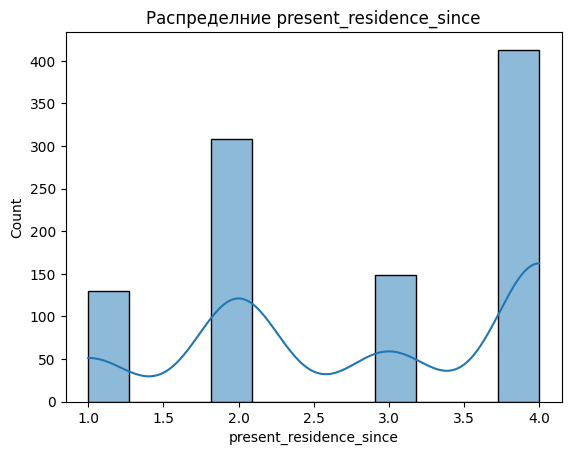

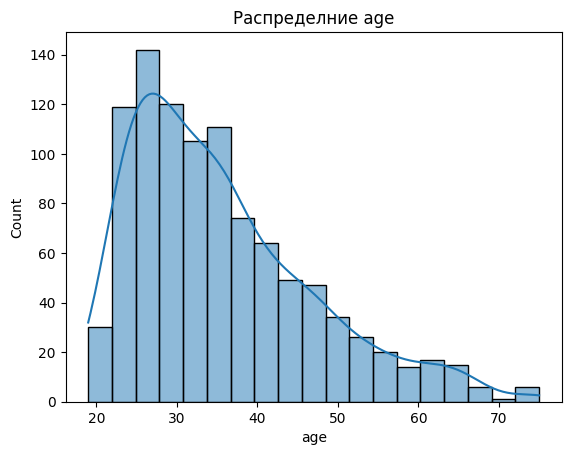

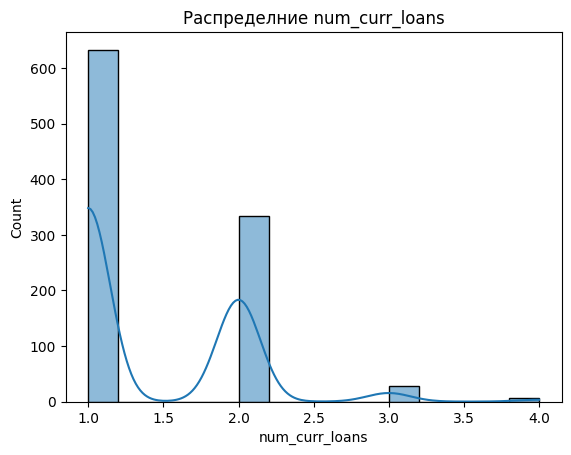

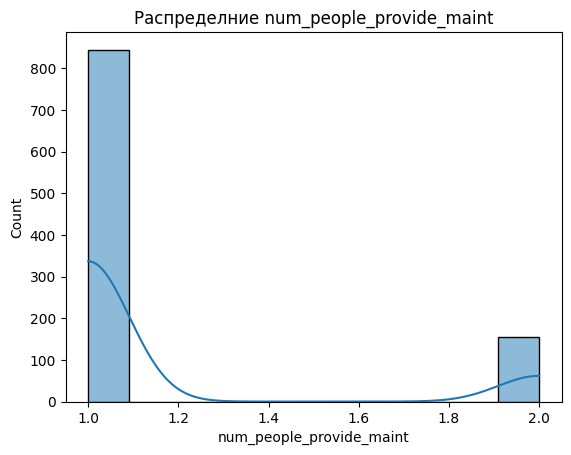

In [ ]:
num_cols = raw_data.select_dtypes(include=['int64']).columns

for col in num_cols:
    sns.histplot(raw_data[col], kde=True)
    plt.title(f'Распределние {col}')
    plt.show()

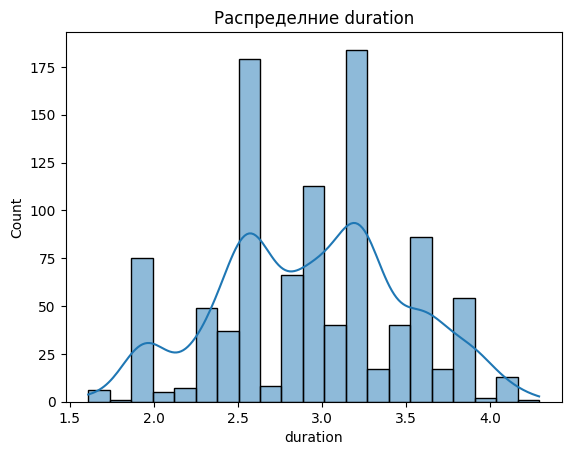

In [ ]:
raw_data.duration = np.log1p(raw_data.duration)

sns.histplot(raw_data.duration, kde=True)
plt.title(f'Распределние duration')
plt.show()

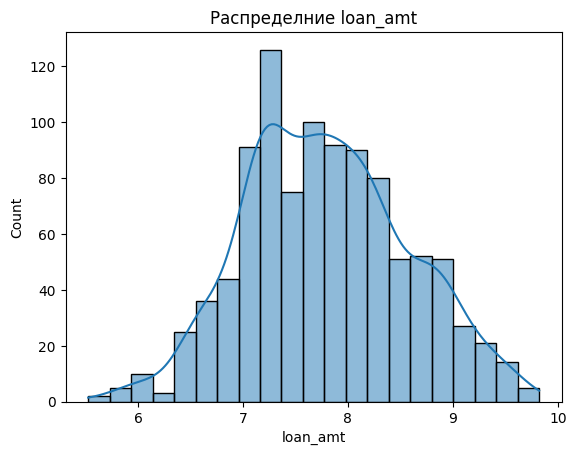

In [ ]:
raw_data.loan_amt = np.log1p(raw_data.loan_amt)

sns.histplot(raw_data.loan_amt, kde=True)
plt.title(f'Распределние loan_amt')
plt.show()

### 1.4 Корреляционный анализ

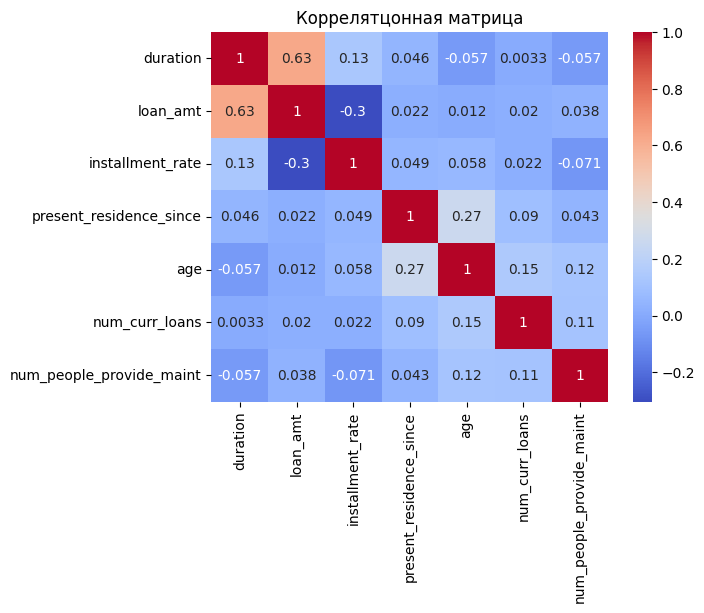

In [ ]:
corr_matrix = raw_data[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Коррелятцонная матрица')
plt.show()

## 2 Предобработка данных

In [ ]:
preprocessed_data = raw_data.copy()

In [ ]:
# Разбиение personal_stat_gender на два признака
preprocessed_data[['gender', 'marital_status']] = preprocessed_data.personal_stat_gender.str.split(':', expand=True)
preprocessed_data.drop(columns = ['personal_stat_gender'], inplace=True)


Значения в gender
male      690
female    310
Name: count, dtype: int64
____________________________________________________________________________________________________



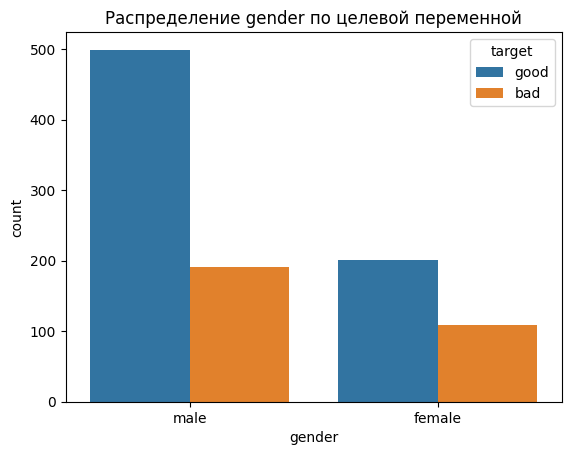

____________________________________________________________________________________________________

Значения в marital_status
single                 548
divorced_or_married    310
married_or_widowed      92
divorced                50
Name: count, dtype: int64
____________________________________________________________________________________________________



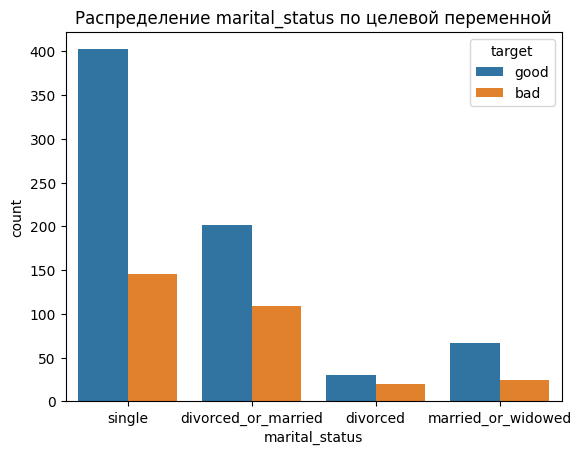

____________________________________________________________________________________________________


In [ ]:
for col in ['gender', 'marital_status']:
    print()
    print(f'Значения в {preprocessed_data[col].value_counts()}')
    print('_' * 100)
    print()
    sns.countplot(x=col, hue='target',  data=preprocessed_data)
    plt.title(f'Распределение {col} по целевой переменной')
    plt.show()
    print('_' * 100)


Значения в marital_status
single                 548
divorced_or_married    310
married_or_widowed      92
divorced                50
Name: count, dtype: int64
____________________________________________________________________________________________________



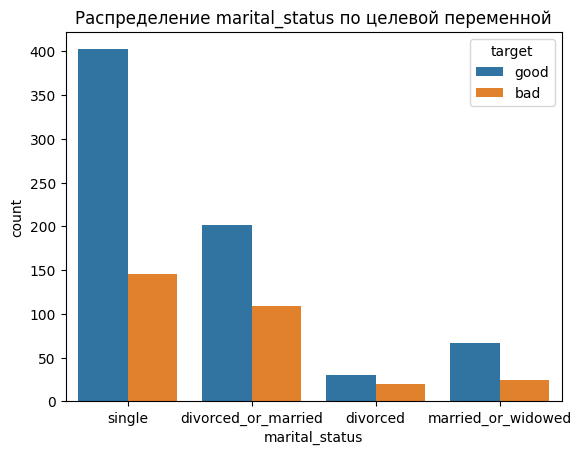

____________________________________________________________________________________________________

Значения в job
skilled_official           630
unskilled_resident         200
management_or_self_emp     148
unemployed_non_resident     22
Name: count, dtype: int64
____________________________________________________________________________________________________



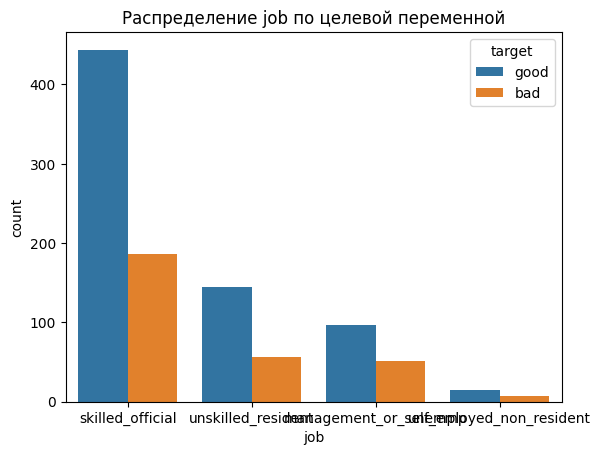

____________________________________________________________________________________________________

Значения в purpose
radio_tv               280
car_new                234
furniture_equipment    181
car_used               103
business                97
education               50
repairs                 22
domestic_applience      12
others                  12
retraining               9
Name: count, dtype: int64
____________________________________________________________________________________________________



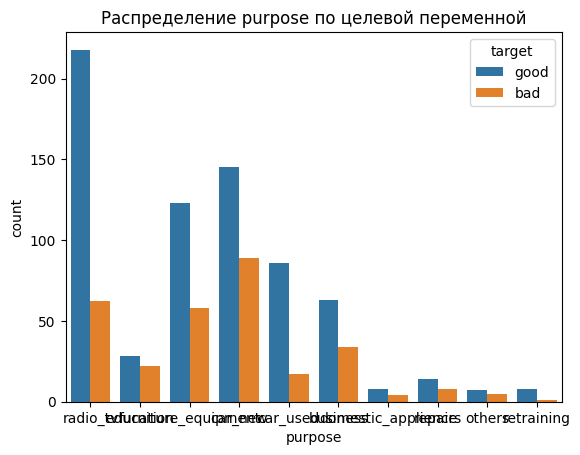

____________________________________________________________________________________________________

Значения в cred_hist
curr_loans_paid_duly            530
risky_acc_or_curr_loan_other    293
delay_in_past                    88
paid_duly_this_bank              49
no_loan_or_paid_duly_other       40
Name: count, dtype: int64
____________________________________________________________________________________________________



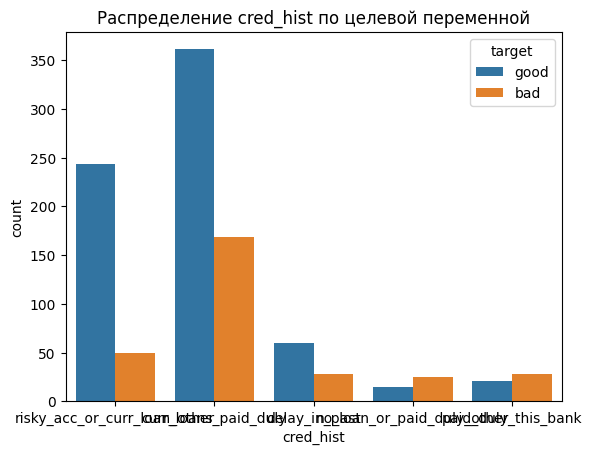

____________________________________________________________________________________________________

Значения в saving_acc_bonds
below_100                603
unknown_no_saving_acc    183
below_500                103
below_1000                63
above_1000                48
Name: count, dtype: int64
____________________________________________________________________________________________________



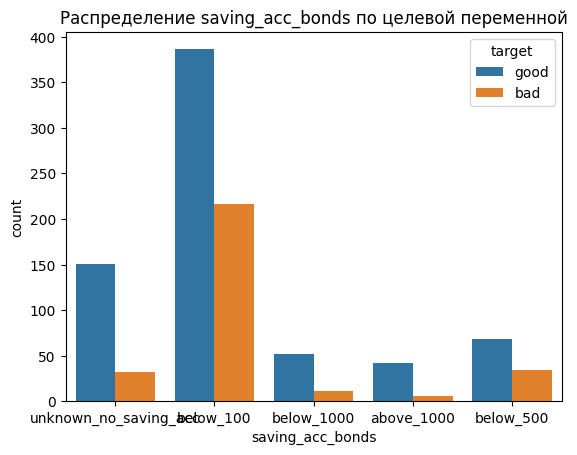

____________________________________________________________________________________________________


In [ ]:
for col in ['marital_status', 'job', 'purpose', 'cred_hist', 'saving_acc_bonds']:
    print()
    print(f'Значения в {preprocessed_data[col].value_counts()}')
    print('_' * 100)
    print()
    sns.countplot(x=col, hue='target',  data=preprocessed_data)
    plt.title(f'Распределение {col} по целевой переменной')
    plt.show()
    print('_' * 100)

In [ ]:
preprocessed_data.target = preprocessed_data.target.replace({
    'good': 1,
    'bad': 0
})

preprocessed_data.is_foreign_worker = preprocessed_data.is_foreign_worker.replace({
    'yes': 0,
    'no': 1
})

preprocessed_data.telephone = preprocessed_data.telephone.replace({
    'yes': 1,
    'no':0
})

<ipython-input-145-30b6c44c6818>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  preprocessed_data.target = preprocessed_data.target.replace({
<ipython-input-145-30b6c44c6818>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  preprocessed_data.is_foreign_worker = preprocessed_data.is_foreign_worker.replace({
<ipython-input-145-30b6c44c6818>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To op

In [ ]:
preprocessed_data.duration = np.log1p(preprocessed_data.duration)
preprocessed_data.loan_amt = np.log1p(preprocessed_data.loan_amt)

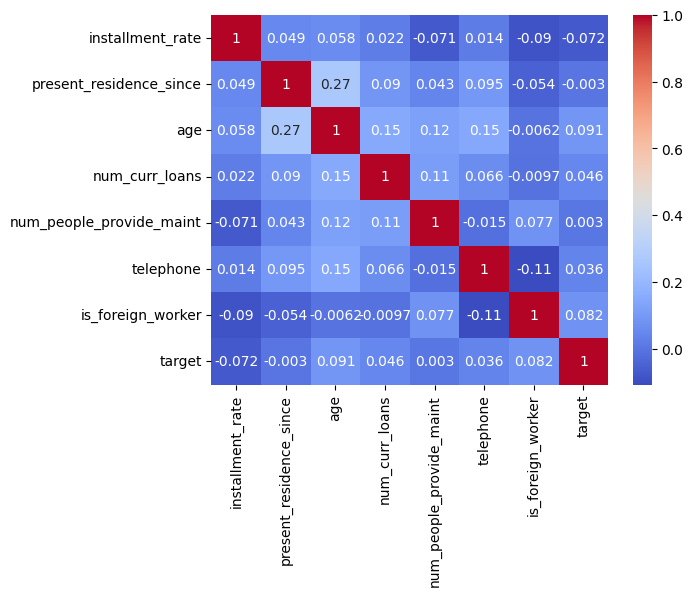

In [ ]:
clear_num_cols = preprocessed_data.select_dtypes(include=['int64', 'int32', 'int16']).columns
clear_corr_matrix = preprocessed_data[clear_num_cols].corr()
sns.heatmap(clear_corr_matrix, annot=True,  cmap='coolwarm')
plt.show()

In [ ]:
# Кодирование возраста как категориальную признак, чтобы рассмотероть, как группы
bins = [i for i in range(0, preprocessed_data.age.max() + 20, 20)]
categorized_age = pd.cut(preprocessed_data.age, bins)
preprocessed_data['categorized_age'] = categorized_age
preprocessed_data = preprocessed_data.drop(columns=['age'], axis=1)

In [ ]:
clear_cat_cols = preprocessed_data.select_dtypes(include=['object']).columns
clear_num_cols = preprocessed_data.select_dtypes(include=['int64']).columns
clear_num_cols = list(clear_num_cols)
clear_num_cols.remove('target')
clear_num_cols

['installment_rate',
 'present_residence_since',
 'num_curr_loans',
 'num_people_provide_maint',
 'telephone',
 'is_foreign_worker']

In [ ]:
ohe_cols = list(clear_cat_cols)
ohe_cols.append('categorized_age')

for col in ohe_cols:
    ohe_data = pd.get_dummies(preprocessed_data[col], prefix=col)
    preprocessed_data = pd.concat([preprocessed_data, ohe_data], axis=1)
    preprocessed_data.drop(columns=[col], inplace=True)

stand_scal_cols = ['duration', 'loan_amt', 'installment_rate',	'present_residence_since',	'num_curr_loans', 'num_people_provide_maint']

scaler = StandardScaler()
preprocessed_data[clear_num_cols] = scaler.fit_transform(preprocessed_data[clear_num_cols])

preprocessed_data.head()

,duration,loan_amt,installment_rate,present_residence_since,num_curr_loans,num_people_provide_maint,telephone,is_foreign_worker,target,checking_acc_status_above:200,checking_acc_status_below_0,checking_acc_status_below_200,checking_acc_status_no_cheking_acc,cred_hist_curr_loans_paid_duly,cred_hist_delay_in_past,cred_hist_no_loan_or_paid_duly_other,cred_hist_paid_duly_this_bank,cred_hist_risky_acc_or_curr_loan_other,purpose_business,purpose_car_new,purpose_car_used,purpose_domestic_applience,purpose_education,purpose_furniture_equipment,purpose_others,purpose_radio_tv,purpose_repairs,purpose_retraining,saving_acc_bonds_above_1000,saving_acc_bonds_below_100,saving_acc_bonds_below_1000,saving_acc_bonds_below_500,saving_acc_bonds_unknown_no_saving_acc,present_employment_since_above_7y,present_employment_since_below_1y,present_employment_since_below_4y,present_employment_since_below_7y,present_employment_since_unemployed,other_debtors_guarantors_co_applicant,other_debtors_guarantors_guarantor,other_debtors_guarantors_none,property_car_or_other,property_life_insurance_or_aggreements,property_real_estate,property_unknown_or_no_property,other_installment_plans_bank,other_installment_plans_none,other_installment_plans_store,housing_for_free,housing_own,housing_rent,job_management_or_self_emp,job_skilled_official,job_unemployed_non_resident,job_unskilled_resident,gender_female,gender_male,marital_status_divorced,marital_status_divorced_or_married,marital_status_married_or_widowed,marital_status_single,"categorized_age_(0, 20]","categorized_age_(20, 40]","categorized_age_(40, 60]","categorized_age_(60, 80]"
0,1.080418,2.087504,0.918477,1.046987,1.027079,-0.428290,1.214598,-0.196014,1,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False,False,False,True
1,1.587564,2.271247,-0.870183,-0.765977,-0.704926,-0.428290,-0.823318,-0.196014,0,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False
2,1.271150,2.157358,-0.870183,0.140505,-0.704926,2.334869,-0.823318,-0.196014,1,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False,True,False,False,False,True,False,False,True,False
3,1.560500,2.299828,-0.870183,1.046987,-0.704926,2.334869,-0.823318,-0.196014,1,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,True,False,True,False,False,False,True,False,False,False,True,False,False,False,True,False,False,True,False
4,1.439569,2.250350,0.024147,1.046987,1.027079,2.334869,-0.823318,-0.196014,0,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,True,False,False,False,True,False,False,False,True,False,False,False,True,False,False,True,False


In [ ]:
preprocessed_data.to_csv('/content/drive/MyDrive/Colab Notebooks/AI_my_project/credit_scoring/preprocessed_data.csv', index=None)

## 3 Обучение моделей

### 3.1 Разделение выборки

In [ ]:
preprocessed_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI_my_project/credit_scoring/preprocessed_data.csv')

In [ ]:
preprocessed_data.head()

,duration,loan_amt,installment_rate,present_residence_since,num_curr_loans,num_people_provide_maint,telephone,is_foreign_worker,target,checking_acc_status_above:200,checking_acc_status_below_0,checking_acc_status_below_200,checking_acc_status_no_cheking_acc,cred_hist_curr_loans_paid_duly,cred_hist_delay_in_past,cred_hist_no_loan_or_paid_duly_other,cred_hist_paid_duly_this_bank,cred_hist_risky_acc_or_curr_loan_other,purpose_business,purpose_car_new,purpose_car_used,purpose_domestic_applience,purpose_education,purpose_furniture_equipment,purpose_others,purpose_radio_tv,purpose_repairs,purpose_retraining,saving_acc_bonds_above_1000,saving_acc_bonds_below_100,saving_acc_bonds_below_1000,saving_acc_bonds_below_500,saving_acc_bonds_unknown_no_saving_acc,present_employment_since_above_7y,present_employment_since_below_1y,present_employment_since_below_4y,present_employment_since_below_7y,present_employment_since_unemployed,other_debtors_guarantors_co_applicant,other_debtors_guarantors_guarantor,other_debtors_guarantors_none,property_car_or_other,property_life_insurance_or_aggreements,property_real_estate,property_unknown_or_no_property,other_installment_plans_bank,other_installment_plans_none,other_installment_plans_store,housing_for_free,housing_own,housing_rent,job_management_or_self_emp,job_skilled_official,job_unemployed_non_resident,job_unskilled_resident,gender_female,gender_male,marital_status_divorced,marital_status_divorced_or_married,marital_status_married_or_widowed,marital_status_single,"categorized_age_(0, 20]","categorized_age_(20, 40]","categorized_age_(40, 60]","categorized_age_(60, 80]"
0,1.080418,2.087504,0.918477,1.046987,1.027079,-0.428290,1.214598,-0.196014,1,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False,False,False,True
1,1.587564,2.271247,-0.870183,-0.765977,-0.704926,-0.428290,-0.823318,-0.196014,0,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False
2,1.271150,2.157358,-0.870183,0.140505,-0.704926,2.334869,-0.823318,-0.196014,1,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False,True,False,False,False,True,False,False,True,False
3,1.560500,2.299828,-0.870183,1.046987,-0.704926,2.334869,-0.823318,-0.196014,1,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,True,False,True,False,False,False,True,False,False,False,True,False,False,False,True,False,False,True,False
4,1.439569,2.250350,0.024147,1.046987,1.027079,2.334869,-0.823318,-0.196014,0,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,True,False,False,False,True,False,False,False,True,False,False,False,True,False,False,True,False


In [ ]:
labels = preprocessed_data['target']
features = preprocessed_data.drop(['target'], axis=1)

In [ ]:
features_train, features_test, labels_train, labels_test = train_test_split(
    features, labels, test_size=0.2
)

In [ ]:
features_test, feature_validation, labels_test, labels_validation = train_test_split(
    features_test, labels_test, test_size=0.5
)

In [ ]:
for splite in [features_train, features_test, feature_validation, labels_train, labels_test, labels_validation]:
  print(len(splite))

800
100
100
800
100
100


### 3.2 Обучение моделей

In [ ]:
#Логистическая регрессия
lr_model = LogisticRegression(random_state=52)
lr_model.fit(features_train, labels_train)

#Дерево решений
dt_model = DecisionTreeClassifier(random_state=52)
dt_model.fit(features_train, labels_train)

#Метод опорных веткоров
svm_model = SVC(random_state=52)
svm_model.fit(features_train, labels_train)

# Наивный Баесовский
nb_model = GaussianNB()
nb_model.fit(features_train, labels_train)

#Случайный лес
rf_model = RandomForestClassifier(random_state=52)
rf_model.fit(features_train, labels_train)

#Градиентный бустинг
gb_model = GradientBoostingClassifier(random_state=52)
gb_model.fit(features_train, labels_train)

#AdaBoost
ab_model = AdaBoostClassifier(random_state=52)
ab_model.fit(features_train, labels_train)

AdaBoostClassifier(random_state=52)

## 4 Валидация моделей

In [ ]:
def model_scores(models):
    result = pd.DataFrame()
    for model in models:
      model_predict = model.predict(feature_validation)
      model_name = model.__class__.__name__
      model_score = pd.DataFrame(
          data = {
            'Доставерность': model.score(feature_validation, labels_validation),
            'F1-мера': f1_score(labels_validation, model_predict),
            'ROC-AUC': roc_auc_score(labels_validation, model_predict),
            'log-loss': log_loss(labels_validation, model_predict)
          },
          index = [model_name]
      )
      result = pd.concat([result, model_score], axis=0)
    return result

models = [lr_model, dt_model, svm_model, rf_model, nb_model, gb_model, ab_model]
model_scores(models)

,Доставерность,F1-мера,ROC-AUC,log-loss
LogisticRegression,0.81,0.861314,0.782375,6.848294
DecisionTreeClassifier,0.75,0.822695,0.694483,9.010913
SVC,0.80,0.868421,0.704067,7.208731
RandomForestClassifier,0.85,0.897959,0.784712,5.406548
GaussianNB,0.76,0.809524,0.772791,8.650477
GradientBoostingClassifier,0.79,0.857143,0.714586,7.569167
AdaBoostClassifier,0.79,0.857143,0.714586,7.569167


##5 Оптимизация параметров

### 5.1 Логистическая регрессия

In [ ]:
lr_parameters = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga', 'lbfgs'],
    'max_iter': [900],
    'random_state': [52]
}

lr_gs = GridSearchCV(
    estimator=lr_model,
    param_grid=lr_parameters,
    cv=5,
    scoring='accuracy'
)

lr_gs.fit(features_train, labels_train)

lr_winner = lr_gs.best_estimator_
lr_winner

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

LogisticRegression(C=1, max_iter=900, penalty='l1', random_state=52,
                   solver='saga')

In [ ]:
model_scores([lr_model, lr_winner])

,Доставерность,F1-мера,ROC-AUC,log-loss
LogisticRegression,0.81,0.861314,0.782375,6.848294
LogisticRegression,0.82,0.867647,0.798504,6.487858


### 5.2 Дерево решений

In [ ]:
dt_param = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [5, 10, 20],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [2, 5, 10],
    'max_features': ['log2', 'sqrt'],
    'min_impurity_decrease': [0.0, 0.1, 0.5],
    'splitter': ['best', 'random'],
    'class_weight': ['balanced', None],
    'random_state': [52]
}

dt_gs = GridSearchCV(
    estimator = dt_model,
    param_grid = dt_param,
    scoring = 'accuracy',
    cv = 5,
    n_jobs = -1
)

dt_gs.fit(features_train, labels_train)

dt_winner = dt_gs.best_estimator_
dt_winner

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       min_samples_leaf=5, min_samples_split=5, random_state=52,
                       splitter='random')

In [ ]:
model_scores([dt_model, dt_winner])

,Доставерность,F1-мера,ROC-AUC,log-loss
DecisionTreeClassifier,0.75,0.822695,0.694483,9.010913
DecisionTreeClassifier,0.79,0.862745,0.687938,7.569167


### 5.3 Машина опорных векторов

In [ ]:
svc_param = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4],
    'gamma': ['auto', 'scale', 0.1, 0.01],
    'class_weight': ['balanced', None],
    'random_state': [52]
}

svc_gs = GridSearchCV(
    estimator = svm_model,
    param_grid = svc_param,
    cv = 5,
    scoring = 'f1_macro',
    n_jobs = -1
)

svc_gs.fit(features_train, labels_train)
svc_winner = svc_gs.best_estimator_
svc_winner

SVC(C=1, class_weight='balanced', degree=2, gamma='auto', kernel='linear',
    random_state=52)

In [ ]:
model_scores([svm_model, svc_winner])

,Доставерность,F1-мера,ROC-AUC,log-loss
SVC,0.80,0.868421,0.704067,7.208731
SVC,0.81,0.850394,0.826788,6.848294


### 5.4 Наивная Байесовская модель

In [ ]:
nb_param = {
    'var_smoothing': np.logspace(-10, 0, 10)
}

nb_gs = GridSearchCV(
    estimator = nb_model,
    param_grid = nb_param,
    cv = 5,
    n_jobs = -1,
    scoring='f1_macro'
)

nb_gs.fit(features_train, labels_train)
nb_winner = nb_gs.best_estimator_
nb_winner

GaussianNB(var_smoothing=0.07742636826811278)

In [ ]:
model_scores([nb_model, nb_winner])

,Доставерность,F1-мера,ROC-AUC,log-loss
GaussianNB,0.76,0.809524,0.772791,8.650477
GaussianNB,0.84,0.882353,0.821879,5.766985


### 5.5 Случайный лес

In [ ]:
rf_param = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['log2', 'sqrt'],
    'class_weight': ['balanced', None],
    'bootstrap': [True, False],
    'random_state': [52]
}

rf_gs = GridSearchCV(
    estimator = rf_model,
    param_grid = rf_param,
    cv = 5,
    scoring = 'f1_macro',
    n_jobs = -1
)

rf_gs.fit(features_train, labels_train)

rf_winner = rf_gs.best_estimator_
rf_winner

RandomForestClassifier(class_weight='balanced', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=50, random_state=52)

In [ ]:
rf_best_param = rf_gs.best_params_
rf_best_param

{'bootstrap': True,
 'class_weight': 'balanced',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 50,
 'random_state': 52}

In [ ]:
model_scores([rf_model, rf_winner])

,Доставерность,F1-мера,ROC-AUC,log-loss
RandomForestClassifier,0.85,0.897959,0.784712,5.406548
RandomForestClassifier,0.82,0.875000,0.762973,6.487858


### 5.6 Градиентный бустинг

In [ ]:
gb_param = {
    'n_estimators': [100],
    'learning_rate': [1, 0.1, 0.05],
    'max_depth': [5, 7, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [5, 10, 15],
    'max_features': ['log2'],
    # 'init': ['zero', None],
    'random_state': [52]
    # 'validation_fraction': [0.1, 0.2]

}

gb_gs = GridSearchCV(
    estimator = gb_model,
    param_grid = gb_param,
    cv = 3,
    n_jobs=-1,
    scoring='f1_macro'
)

gb_gs.fit(features_train, labels_train)
gb_winner = gb_gs.best_estimator_
gb_best_params = gb_gs.best_params_

print(gb_best_params)

{'learning_rate': 0.05, 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 52}


In [ ]:
model_scores([gb_model, gb_winner])

,Доставерность,F1-мера,ROC-AUC,log-loss
GradientBoostingClassifier,0.79,0.857143,0.714586,7.569167
GradientBoostingClassifier,0.79,0.857143,0.714586,7.569167


### 5.7 AdaBoost

In [ ]:
ab_model_gs = AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=42), random_state=42)

ab_param = {
    'n_estimators': [50, 100],
    'learning_rate': [0.1, 1.0, 2],
    'estimator__max_depth': [1, 2, 3],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 5]
}

ab_gs = GridSearchCV(
    estimator = ab_model_gs,
    param_grid = ab_param,
    cv=5,
    n_jobs=-1,
    scoring = 'f1_macro'
)

ab_gs.fit(features_train, labels_train)
ab_winner = ab_gs.best_estimator_

In [ ]:
ab_best_param = ab_gs.best_params_
print(ab_best_param)

{'estimator__max_depth': 2, 'estimator__min_samples_leaf': 2, 'estimator__min_samples_split': 10, 'learning_rate': 1.0, 'n_estimators': 100}


In [ ]:
model_scores([ab_model, ab_winner])

,Доставерность,F1-мера,ROC-AUC,log-loss
AdaBoostClassifier,0.79,0.857143,0.714586,7.569167
AdaBoostClassifier,0.81,0.867133,0.755727,6.848294


##6 Тест

In [ ]:
best_models = [lr_winner, dt_winner, svm_model, nb_winner, rf_model, gb_winner, ab_model]

def model_scores_test(models):
    result = pd.DataFrame()
    for model in models:
      model_predict = model.predict(features_test)
      model_name = model.__class__.__name__
      model_score = pd.DataFrame(
          data = {
            'Доставерность': model.score(features_test, labels_test),
            'F1-мера': f1_score(labels_test, model_predict),
            'ROC-AUC': roc_auc_score(labels_test, model_predict),
            'log-loss': log_loss(labels_test, model_predict)
          },
          index = [model_name]
      )
      result = pd.concat([result, model_score], axis=0)
    return result

print('Валидационная выборка')
print('-'* 70)
display(model_scores(best_models))
print('='* 70)
print('Тестовая Выборка')
print('-'* 70)
test = model_scores_test(best_models)
display(test)
print('='* 70)

Валидационная выборка
----------------------------------------------------------------------


,Доставерность,F1-мера,ROC-AUC,log-loss
LogisticRegression,0.82,0.867647,0.798504,6.487858
DecisionTreeClassifier,0.79,0.862745,0.687938,7.569167
SVC,0.80,0.868421,0.704067,7.208731
GaussianNB,0.84,0.882353,0.821879,5.766985
RandomForestClassifier,0.85,0.897959,0.784712,5.406548
GradientBoostingClassifier,0.79,0.857143,0.714586,7.569167
AdaBoostClassifier,0.79,0.857143,0.714586,7.569167


Тестовая Выборка
----------------------------------------------------------------------


,Доставерность,F1-мера,ROC-AUC,log-loss
LogisticRegression,0.78,0.858974,0.727144,7.929604
DecisionTreeClassifier,0.79,0.867925,0.709780,7.569167
SVC,0.81,0.884848,0.675053,6.848294
GaussianNB,0.75,0.836601,0.709072,9.010913
RandomForestClassifier,0.84,0.902439,0.739901,5.766985
GradientBoostingClassifier,0.82,0.888889,0.727853,6.487858
AdaBoostClassifier,0.80,0.873418,0.739192,7.208731


In [ ]:
test['Доставерность'].mean()

0.7985714285714286

##8 Результаты предобработки данных и выбора модели

#### 1. **Предобработка числовых признаков**
   - В ходе исследования числовых признаков была выявлена асимметрия в распределении признаков **`duration`** и **`loan_amt`**. Для приведения распределения к виду, близкому к нормальному, к данным признакам было применено логарифмическое преобразование (с использованием функции `np.log1p`).
   - Остальные числовые признаки имеют дискретное распределение с небольшим количеством уникальных значений. Для обеспечения совместимости с алгоритмами машинного обучения все числовые признаки были стандартизированы с использованием `StandardScaler`.

#### 2. **Предобработка категориальных признаков**
   - Категориальные признаки были закодированы с использованием метода **One-Hot Encoding**. Этот подход позволяет преобразовать категориальные переменные в бинарные признаки, что повышает эффективность обучения моделей.

#### 3. **Выбор метрик качества**
   - Поскольку задача представляет собой бинарную классификацию, для оценки качества моделей были выбраны следующие метрики:
     - **F1-мера**: Учитывает как точность, так и полноту модели, что особенно важно при дисбалансе классов.
     - **ROC-AUC**: Оценивает способность модели разделять классы на основе вероятностных оценок.
     - **Log-loss**: Измеряет качество предсказанных вероятностей, что полезно для задач классификации с вероятностным выходом.

#### 4. **Выбор и настройка модели**
   - В результате валидации и тестирования различных моделей наиболее эффективной оказалась модель **случайного леса (Random Forest)**. Гиперпараметры модели были подобраны с использованием поиска по сетке (GridSearchCV):
     - **n_estimators**: 50
     - **max_depth**: None
     - **min_samples_split**: 5
     - **min_samples_leaf**: 2
     - **max_features**: 'sqrt'
     - **class_weight**: 'balanced'
     - **bootstrap**: True
     - **random_state**: 52

#### 5. **Оценка качества модели**
   - Модель случайного леса продемонстрировала высокую эффективность в предсказании целевой переменной. Результаты на тестовой выборке показали, что модель не переобучена и хорошо обобщает данные. Основные метрики качества на тестовой выборке:
     - **Доставерность**: 0.84
     - **F1-мера**: 0.902439
     - **ROC-AUC**: 0.739901
     - **Log-loss**: 5.766985








